| **Inicio** | **atrás 27** | **Siguiente 29** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./27.Correlacion_de_Pearson.ipynb)| [⏩](./29.Distribucion_Normal.ipynb)|

# **28. Qué es la Estadística Inferencial: Fundamentos de la Ciencia de Datos**

![inferencial](../imagenes%20Estadisticas/inferencia.png "inferencial")

## **1. Introducción**

La estadística inferencial es la rama de la estadística que se encarga de realizar inferencias sobre una población a partir de una muestra de datos. En otras palabras, permite generalizar las conclusiones obtenidas de un conjunto limitado de datos a toda la población.

Por ejemplo, supongamos que queremos estimar la altura promedio de los estudiantes de una universidad. Sería imposible medir la altura de todos los estudiantes, por lo que se puede tomar una muestra aleatoria de ellos y utilizar esa información para hacer una inferencia sobre la altura promedio de todos los estudiantes de la universidad.

Para realizar inferencias estadísticas, se utilizan técnicas como la estimación de parámetros y la prueba de hipótesis.

A continuación se muestra un ejemplo de cómo realizar una prueba de hipótesis en Python. Supongamos que se tiene una muestra de notas de exámenes y se quiere saber si la media de las notas en la población es igual a 70.

In [1]:
import numpy as np
from scipy import stats

# Datos de muestra
notas = np.array([60, 70, 80, 90, 75, 85, 72, 78, 82, 68])

# Prueba de hipótesis
resultado = stats.ttest_1samp(notas, 70)

# Imprimir resultado
if resultado.pvalue < 0.05:
    print('La media de notas es significativamente diferente de 70')
else:
    print('No se puede rechazar la hipótesis de que la media de notas es igual a 70')

No se puede rechazar la hipótesis de que la media de notas es igual a 70


En este ejemplo, la hipótesis nula es que la media de notas es igual a 70, y la alternativa es que es diferente de 70. La prueba de hipótesis devuelve un valor de pvalue que indica la probabilidad de obtener una media muestral igual o más extrema que la observada, si la hipótesis nula es cierta. Si este valor es menor que el nivel de significancia elegido (en este caso, 0.05), se rechaza la hipótesis nula y se concluye que la media de notas es significativamente diferente de 70.

En cuanto a la representación gráfica de la estadística inferencial, una forma común de hacerlo es mediante intervalos de confianza. Estos intervalos indican el rango de valores en el que se espera que se encuentre el verdadero valor del parámetro con un cierto nivel de confianza.

Por ejemplo, si se quiere estimar la media de notas en la población, se puede calcular un intervalo de confianza del 95% para esta media a partir de la muestra de notas. En Python, esto se puede hacer de la siguiente manera:

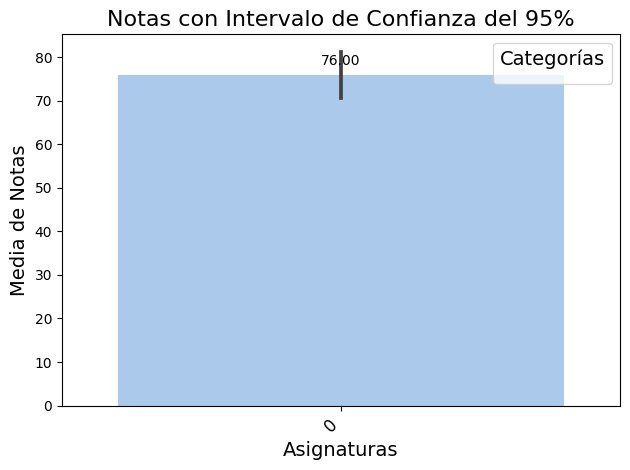

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'notas'

# Personalizar la paleta de colores
mi_paleta = sns.color_palette("pastel")

# Crear el gráfico de barras con intervalo de confianza del 95%
ax = sns.barplot(data=notas, errorbar=('ci', 95), palette=mi_paleta)

# Personalizar el título y los ejes
ax.set_title('Notas con Intervalo de Confianza del 95%', fontsize=16)
ax.set_xlabel('Asignaturas', fontsize=14)
ax.set_ylabel('Media de Notas', fontsize=14)

# Rotar las etiquetas del eje x para mayor legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Mostrar la leyenda (si es aplicable)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Categorías', title_fontsize='14', fontsize='12', loc='upper right')

# Ajustar el diseño para evitar cortar las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **2. Estadística descriptiva e inferencial**

La estadística es una disciplina que se divide en dos áreas principales: la estadística descriptiva y la estadística inferencial.

La estadística descriptiva se enfoca en resumir y describir las características de un conjunto de datos, mientras que la estadística inferencial se enfoca en hacer inferencias sobre una población a partir de una muestra de datos.

A continuación, se presenta un ejemplo de cómo se pueden utilizar ambas áreas de la estadística en Python para analizar un conjunto de datos.

Primero, se importan las bibliotecas necesarias:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

Este conjunto de datos contiene información sobre el monto de la propina que los clientes dejaron en un restaurante, junto con información sobre la factura total, el género del servidor, el tamaño del grupo, etc.

Se puede utilizar la estadística descriptiva para obtener información sobre las características del conjunto de datos, como la media, la mediana, la desviación estándar, etc. Por ejemplo, para obtener un resumen de las variables numéricas, se puede utilizar la función ```describe()```:

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


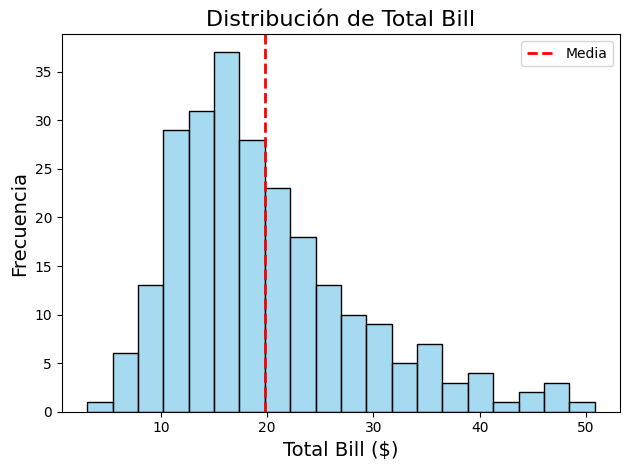

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'total_bill'

# Personalizar el color del histograma
color = 'skyblue'

# Crear el gráfico de histograma sin KDE
sns.histplot(df['total_bill'], kde=False, color=color, bins=20)  # Puedes ajustar el número de bins según tus preferencias

# Personalizar el título y los ejes
plt.title('Distribución de Total Bill', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir líneas verticales o cualquier otra personalización adicional
# Por ejemplo, añadir una línea vertical para la media
mean_value = df['total_bill'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Media')

# Mostrar la leyenda
plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Para visualizar las relaciones entre variables numéricas, se pueden utilizar gráficos de dispersión:

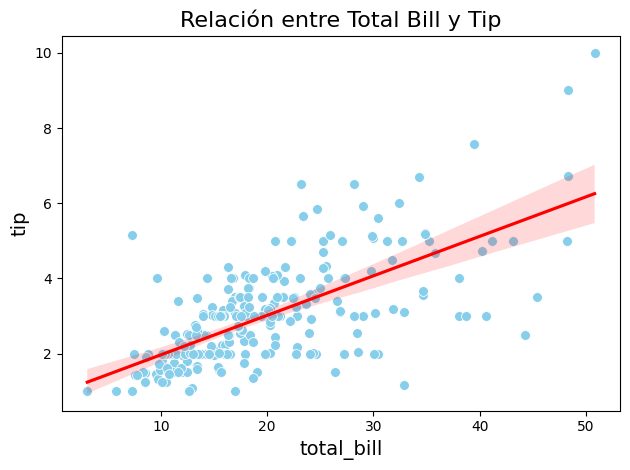

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con columnas 'total_bill' y 'tip'

# Personalizar el color y el tamaño de los puntos
color = 'skyblue'
size = 50

# Crear el gráfico de dispersión
sns.scatterplot(x='total_bill', y='tip', data=df, color=color, s=size)

# Personalizar el título y los ejes
plt.title('Relación entre Total Bill y Tip', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=14)
plt.ylabel('Tip ($)', fontsize=14)

# Añadir líneas, anotaciones u otras personalizaciones adicionales
# Por ejemplo, añadir una línea de regresión
sns.regplot(x='total_bill', y='tip', data=df, scatter=False, color='red')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Para utilizar la estadística inferencial, se puede realizar una prueba de hipótesis para determinar si hay una relación significativa entre dos variables numéricas. Por ejemplo, se puede realizar una prueba de correlación de Pearson entre el total de la factura y la propina:

In [7]:
from scipy.stats import pearsonr

r, p = pearsonr(df['total_bill'], df['tip'])
print(f'Correlación de Pearson: {r:.3f}, valor p: {p:.3f}')

Correlación de Pearson: 0.676, valor p: 0.000


Esto devuelve un valor de correlación de Pearson de 0.676 y un valor p muy bajo, lo que sugiere que hay una relación significativa entre el total de la factura y la propina.

Para visualizar la matriz de correlaciones entre las variables numéricas, se puede utilizar un mapa de calor:

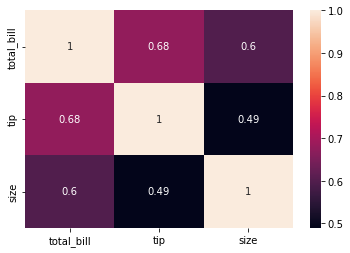

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Esto muestra que hay una fuerte correlación positiva entre el total de la factura y la propina, así como una correlación positiva moderada entre el tamaño del grupo y el total de la factura y la propina.

En resumen, la estadística descriptiva se puede utilizar para resumir y visualizar las características de un conjunto de datos, mientras que la estadística inferencial se puede utilizar para hacer inferencias sobre una población a partir de una muestra de datos. 

## **3. Librerías de python para estadística inferencial**

Existen varias librerías de Python que se pueden utilizar para realizar análisis de estadística inferencial, algunas de las más comunes son:

* NumPy: es una biblioteca para Python que se utiliza para realizar cálculos numéricos y estadísticos. Proporciona funciones para realizar operaciones matemáticas básicas y avanzadas, así como para trabajar con matrices y vectores.

* SciPy: es una biblioteca para Python que se utiliza para realizar cálculos científicos y estadísticos. Proporciona funciones para realizar pruebas estadísticas, optimización, interpolación, integración, entre otras.

* Pandas: es una biblioteca para Python que se utiliza para la manipulación y análisis de datos. Proporciona funciones para la lectura y escritura de datos, así como para la manipulación y análisis de datos tabulares.

* Statsmodels: es una biblioteca para Python que se utiliza para realizar análisis estadísticos. Proporciona funciones para realizar modelos estadísticos, pruebas de hipótesis, análisis de series de tiempo, entre otras.

* Scikit-learn: es una biblioteca para Python que se utiliza para realizar aprendizaje automático. Proporciona funciones para realizar modelos de regresión, clasificación, agrupamiento, reducción de dimensionalidad, entre otras.

Estas bibliotecas son ampliamente utilizadas y proporcionan muchas funcionalidades que permiten realizar análisis de estadística inferencial en Python de manera eficiente y efectiva.

| **Inicio** | **atrás 27** | **Siguiente 29** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./27.Correlacion_de_Pearson.ipynb)| [⏩](./29.Distribucion_Normal.ipynb)|